In [41]:
import numpy as np
import pandas as pd
import torch
from torch import nn

import d2l

In [42]:
train_data = pd.read_csv(d2l.download('kaggle_house_train'))
test_data = pd.read_csv(d2l.download('kaggle_house_test'))

In [43]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [44]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
train_data.iloc[0:5, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000
4,5,60,RL,84.0,WD,Normal,250000


In [46]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [47]:
all_features.shape

(2919, 79)

In [8]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

In [9]:
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

In [10]:
all_features.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,0
0,0.073350,RL,-0.207948,-0.207071,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068668,NaN,NaN,NaN,-0.087658,-1.598563,0.138730,WD,Normal,NaN
1,-0.872264,RL,0.409724,-0.091855,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.068668,NaN,NaN,NaN,-0.087658,-0.488943,-0.614228,WD,Normal,NaN
2,0.073350,RL,-0.084413,0.073455,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.068668,NaN,NaN,NaN,-0.087658,0.990552,0.138730,WD,Normal,NaN
3,0.309753,RL,-0.413838,-0.096864,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.068668,NaN,NaN,NaN,-0.087658,-1.598563,-1.367186,WD,Abnorml,NaN
4,0.073350,RL,0.574436,0.375020,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.068668,NaN,NaN,NaN,-0.087658,2.100173,0.138730,WD,Normal,NaN


In [11]:
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [12]:
all_features.shape

(2919, 80)

In [13]:
all_features = pd.get_dummies(all_features, dummy_na=True)

In [14]:
all_features.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.073350,-0.207948,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.509840,0.575228,-0.288554,...,False,True,False,False,False,False,False,True,False,False
1,-0.872264,0.409724,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.572637,1.171591,-0.288554,...,False,True,False,False,False,False,False,True,False,False
2,0.073350,-0.084413,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322063,0.092875,-0.288554,...,False,True,False,False,False,False,False,True,False,False
3,0.309753,-0.413838,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.572637,-0.499103,-0.288554,...,False,True,False,True,False,False,False,False,False,False
4,0.073350,0.574436,0.375020,1.374324,-0.517023,0.951306,0.733056,1.360357,0.463410,-0.288554,...,False,True,False,False,False,False,False,True,False,False


In [15]:
all_features.shape

(2919, 331)

In [16]:
n_train = train_data.shape[0]

In [17]:
train_features = torch.tensor(all_features[:n_train].values.astype(np.float32) , dtype=torch.float32)

In [18]:
train_features.shape

torch.Size([1460, 331])

In [19]:
test_features = torch.tensor(all_features[n_train:].values.astype(np.float32), dtype=torch.float32)

In [20]:
test_features.shape

torch.Size([1459, 331])

In [21]:
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

In [22]:
train_labels.shape

torch.Size([1460, 1])

In [23]:
loss = nn.MSELoss()

In [24]:
in_features = train_features.shape[1]

In [25]:
def get_net():
    return nn.Sequential(nn.Linear(in_features, 1))

In [26]:
def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()

In [36]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [28]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train, X_valid, y_valid = None, None, None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), 0)
            y_train = torch.cat((y_train, y_part), 0)
    return X_train, y_train, X_valid, y_valid

In [38]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

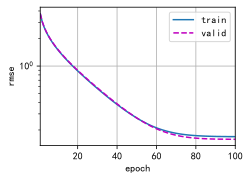

折1，训练log rmse0.168935, 验证log rmse0.158115
折2，训练log rmse0.161734, 验证log rmse0.184452
折3，训练log rmse0.163350, 验证log rmse0.167527
折4，训练log rmse0.168056, 验证log rmse0.154356
折5，训练log rmse0.161777, 验证log rmse0.183825
5-折验证: 平均训练log rmse: 0.164771, 平均验证log rmse: 0.169655


In [39]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [31]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel="epochs",
             ylabel="log rmse", xlim=[1, num_epochs], yscale='log')
    print(f"训练log rmse: {float(train_ls[-1])}:f")
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

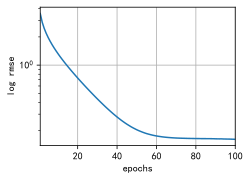

训练log rmse: 0.16199737787246704:f


In [40]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)